In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
request_reply_df = pd.read_csv("./data/requestreply.csv", header=None)
reply_reply_df = pd.read_csv("./data/replyreply.csv", header=None)

In [3]:
def dataset_statistics(df):
    ds_mean = np.mean(df.mean(numeric_only=True))
    ds_median = np.median(df.median(numeric_only=True))
    ds_mean_var = np.mean(df.var(numeric_only=True))
    ds_median_var = np.median(df.var(numeric_only=True))
    return ds_mean, ds_median, ds_mean_var, ds_median_var

In [4]:
request_reply_df.rename(columns={0:'Malicious'}, inplace=True)

In [5]:
request_reply_df["Malicious"].replace('legit', 0, inplace=True)
request_reply_df["Malicious"].replace('malware', 1, inplace=True)

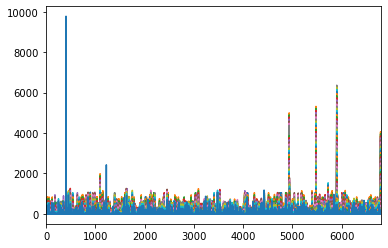

In [6]:
benignware = request_reply_df.loc[request_reply_df["Malicious"] == 0]
benignware.plot(legend=False)

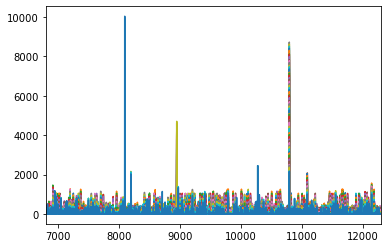

In [7]:
malware = request_reply_df.loc[request_reply_df["Malicious"] == 1]
malware.plot(legend=False)

In [8]:
from prototype_model import *

In [9]:
request_reply_fourier = create_fourier_dataset(request_reply_df)
reply_reply_fourier = create_fourier_dataset(reply_reply_df)
request_reply_cwavelet = create_continuous_wavelet_dataset(request_reply_df)
reply_reply_cwavelet = create_continuous_wavelet_dataset(reply_reply_df)

In [10]:
dataset_statistics(request_reply_fourier)

((58.604390351203385+7.584613306260597e-16j),
 (-1.4514760249295477-5621.282955458517j),
 113461711.81745677,
 100535393.93087971)

In [11]:
dataset_statistics(reply_reply_fourier)

((100.18508077471539+9.62733416023051e-16j),
 (-6.815148765591573+2503.544078804928j),
 152077222.0613499,
 152901167.7689203)

In [12]:
dataset_statistics(request_reply_cwavelet)

(-0.23982914010307635,
 0.032688860041574105,
 97.32855683618969,
 78.07325231009084)

In [13]:
dataset_statistics(reply_reply_cwavelet)

(-0.13882611736088013,
 -0.035714383126698904,
 181.86647260223148,
 176.2678754236699)

In [14]:
features = generate_features(request_reply_df)
model = build_fc_model(features)
fc_qr_history, fc_qr_results = train_model(model, request_reply_df)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 2s 18ms/step - loss: 3.6526 - accuracy: 0.5400
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6423 - accuracy: 0.6282
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5871 - accuracy: 0.6720
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5485 - accuracy: 0.6997
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5165 - accuracy: 0.7277
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4832 - accuracy: 0.7542
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4601 - accuracy: 0.7722
Epoch 8/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4630 - accuracy: 0.7711
Epoch 9/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4198 - accuracy: 0.8005
Epoch 10/20
99/99 [==============================] - 1s 8ms/step - loss: 0.3883 - accuracy: 0.8235

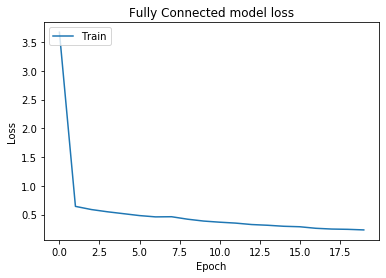

In [15]:
plt.plot(fc_qr_history.history['loss'])
plt.title('Fully Connected model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  25856     
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dense_2 (Dense)              multiple                  65792     
_________________________________________________________________
dense_3 (Dense)              multiple                  257       
Total params: 157,697
Trainable params: 157,697
Non-trainable params: 0
_________________________________________________________________


In [17]:
# features = generate_features(reply_reply_df)
# model = build_fc_model(features)
# fc_rr_history, fc_rr_results = train_model(model, reply_reply_df)

In [18]:
# plt.plot(fc_rr_history.history['loss'])
# # plt.plot(fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [19]:
features = generate_features(request_reply_df)
model = build_conv_model(features)
conv_qr_history, conv_qr_results = train_model(model, request_reply_df)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 3s 34ms/step - loss: 0.6708 - accuracy: 0.5922
Epoch 2/20
99/99 [==============================] - 2s 23ms/step - loss: 0.6175 - accuracy: 0.6627
Epoch 3/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5904 - accuracy: 0.6948
Epoch 4/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5651 - accuracy: 0.7243
Epoch 5/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5440 - accuracy: 0.7351
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5278 - accuracy: 0.7426
Epoch 7/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5145 - accuracy: 0.7460
Epoch 8/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5073 - accuracy: 0.7583
Epoch 9/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5019 - accuracy: 0.7614
Epoch 10/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4886 - accurac

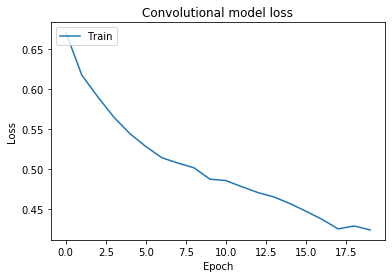

In [20]:
plt.plot(conv_qr_history.history['loss'])
# plt.plot(conv_qr_history.history['val_accuracy'])
plt.title('Convolutional model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [21]:
# features = generate_features(reply_reply_df)
# model = build_conv_model(features)
# conv_rr_history, conv_rr_results = train_model(model, reply_reply_df)

In [22]:
# plt.plot(conv_rr_history.history['accuracy'])
# # plt.plot(conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [24]:
dataset = request_reply_df.copy()
labels = dataset.pop("Malicious")
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=.2, stratify=labels)

In [25]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
predictions = clf.predict(X_test)

In [27]:
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
rf_accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of random forest classifier:" + str(rf_accuracy))

Accuracy of random forest classifier:0.8016260162601626


In [28]:
features = generate_features(request_reply_fourier)
model = build_fc_model(features)
fourier_fc_qr_history, fourier_fc_qr_results = train_model(model, request_reply_fourier)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 2s 18ms/step - loss: nan - accuracy: 0.5512
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 8/20
99/99 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.5528
Epoch 9/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 10/20
99/99 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5528
Epoch 11/20
99/99 [==========

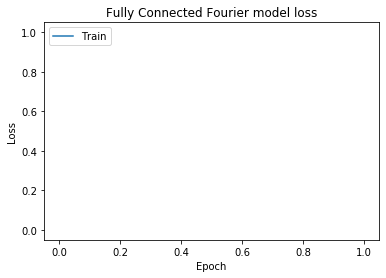

In [29]:
plt.plot(fourier_fc_qr_history.history['loss'])
# plt.plot(fourier_fc_qr_history.history['val_accuracy'])
plt.title('Fully Connected Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [30]:
features = generate_features(request_reply_fourier)
model = build_conv_model(features)
fourier_conv_qr_history, fourier_conv_qr_results = train_model(model, request_reply_fourier)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 4s 38ms/step - loss: 0.7255 - accuracy: 0.4953
Epoch 2/20
99/99 [==============================] - 2s 25ms/step - loss: 0.7026 - accuracy: 0.5221
Epoch 3/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6931 - accuracy: 0.5384
Epoch 4/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6880 - accuracy: 0.5464
Epoch 5/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6836 - accuracy: 0.5520
Epoch 6/20
99/99 [==============================] - 2s 25ms/step - loss: 0.6786 - accuracy: 0.5600
Epoch 7/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6772 - accuracy: 0.5614
Epoch 8/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6731 - accuracy: 0.5686
Epoch 9/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6716 - accuracy: 0.5694
Epoch 10/20
99/99 [==============================] - 2s 24ms/step - loss: 0.6693 - accurac

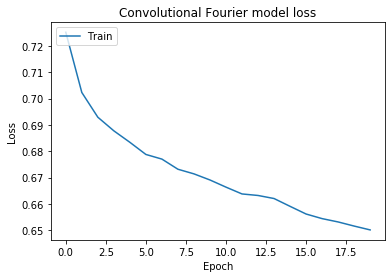

In [31]:
plt.plot(fourier_conv_qr_history.history['loss'])
# plt.plot(fourier_conv_qr_history.history['val_accuracy'])
plt.title('Convolutional Fourier model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
features = generate_features(request_reply_wavelet)
model = build_fc_model(features)
wavelet_fc_qr_history, wavelet_fc_qr_results = train_model(model, request_reply_wavelet)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 2s 18ms/step - loss: 0.8760 - accuracy: 0.5436
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6850 - accuracy: 0.5959
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6403 - accuracy: 0.6351
Epoch 4/20
99/99 [==============================] - 1s 8ms/step - loss: 0.6105 - accuracy: 0.6631
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5820 - accuracy: 0.6938
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5559 - accuracy: 0.7199
Epoch 7/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5365 - accuracy: 0.7363
Epoch 8/20
99/99 [==============================] - 1s 8ms/step - loss: 0.5211 - accuracy: 0.7438
Epoch 9/20
99/99 [==============================] - 1s 9ms/step - loss: 0.5005 - accuracy: 0.7630
Epoch 10/20
99/99 [==============================] - 1s 8ms/step - loss: 0.4751 - accuracy: 0.7794

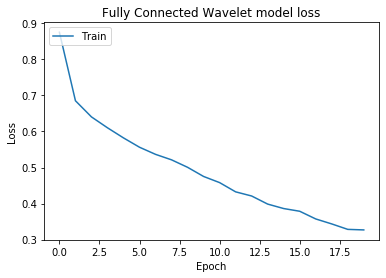

In [33]:
plt.plot(wavelet_fc_qr_history.history['loss'])
plt.title('Fully Connected Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [34]:
# features = generate_features(reply_reply_wavelet)
# model = build_fc_model(features)
# wavelet_fc_rr_history, wavelet_fc_rr_results = train_model(model, reply_reply_wavelet)

In [35]:
# plt.plot(wavelet_fc_rr_history.history['accuracy'])
# plt.plot(wavelet_fc_rr_history.history['val_accuracy'])
# plt.title('Fully Connected Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [36]:
features = generate_features(request_reply_wavelet)
model = build_conv_model(features)
wavelet_conv_qr_history, wavelet_conv_qr_results = train_model(model, request_reply_wavelet)

Train for 99 steps
Epoch 1/20
99/99 [==============================] - 3s 34ms/step - loss: 0.6716 - accuracy: 0.6041
Epoch 2/20
99/99 [==============================] - 2s 24ms/step - loss: 0.5937 - accuracy: 0.6915
Epoch 3/20
99/99 [==============================] - 2s 24ms/step - loss: 0.5507 - accuracy: 0.7279
Epoch 4/20
99/99 [==============================] - 2s 24ms/step - loss: 0.5223 - accuracy: 0.7508
Epoch 5/20
99/99 [==============================] - 2s 23ms/step - loss: 0.5020 - accuracy: 0.7634
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4797 - accuracy: 0.7755
Epoch 7/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4625 - accuracy: 0.7863
Epoch 8/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4482 - accuracy: 0.7931
Epoch 9/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4332 - accuracy: 0.8020
Epoch 10/20
99/99 [==============================] - 2s 23ms/step - loss: 0.4189 - accurac

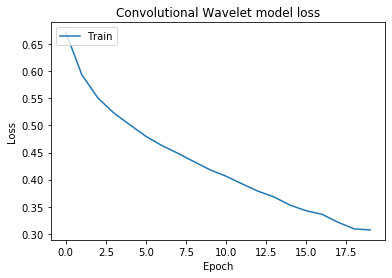

In [37]:
plt.plot(wavelet_conv_qr_history.history['loss'])
plt.title('Convolutional Wavelet model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [38]:
features = generate_features(request_reply_df)
model = fourier_model(features)
fourier_nn_qr_history, fourier_nn_qr_results = train_model(model, request_reply_df)

TypeError: in user code:

    /home/erick/dev/jhu_masters/code/custom_layers.py:23 build  *
        self.kernel = self.add_weight(name='kernel',
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py:469 add_weight  **
        caching_device=caching_device)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/training/tracking/base.py:743 _add_variable_with_custom_getter
        **kwargs_for_getter)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer_utils.py:129 make_variable
        variable_shape = tensor_shape.TensorShape(shape)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:771 __init__
        self._dims = [as_dimension(d) for d in dims_iter]
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:771 <listcomp>
        self._dims = [as_dimension(d) for d in dims_iter]
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:716 as_dimension
        return Dimension(value)
    /home/erick/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_shape.py:200 __init__
        None)
    <string>:3 raise_from
        

    TypeError: Dimension value must be integer or None or have an __index__ method, got <tf.Tensor 'sequential_6/fourier_conv_layer/strided_slice:0' shape=(100, 1) dtype=float32>


In [ ]:
plt.plot(fourier_nn_qr_history.history['loss'])
plt.title('Fourier Neural Network loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# features = generate_features(request_reply_df)
# model = wavelet_model(features)
# wavelet_nn_qr_history, wavelet_nn_qr_results = train_model(model, request_reply_df)

In [ ]:
# plt.plot(wavelet_nn_qr_history.history['loss'])
# plt.title('Wavelet Neural Network loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
# features = generate_features(reply_reply_wavelet)
# model = build_conv_model(features)
# wavelet_conv_rr_history, wavelet_conv_rr_results = train_model(model, reply_reply_wavelet)

In [ ]:
# plt.plot(wavelet_conv_rr_history.history['accuracy'])
# plt.plot(wavelet_conv_rr_history.history['val_accuracy'])
# plt.title('Convolutional Wavelet model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper left')
# plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
errors = [0 if p == label else 1 for p, label in zip(predictions, y_test)]
svm_accuracy = 1 - (np.sum(errors)/len(errors))
print("Accuracy of support vector classifier:" + str(svm_accuracy))

In [ ]:
print("==================================================")
print("=                Overall results                ==")
print("==================================================")
print("    *Request-reply data*")
print("    Fully-Connected test accuracy: {}".format(fc_qr_results[1]))
print("    Convolutional test accuracy: {}".format(conv_qr_results[1]))
print("    Fourier f-c test accuracy: {}".format(fourier_fc_qr_results[1]))
print("    Fourier conv test accuracy: {}".format(fourier_conv_qr_results[1]))
print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_qr_results[1]))
print("    Wavelet conv test accuracy: {}".format(wavelet_conv_qr_results[1]))
print("    Fourier NN test accuracy: {}").format(fourier_nn_qr_results[1])
# print("    Wavelet NN test accuracy: {}").formaat(wavelet_nn_qr_results[1])
print("    Random Forest (control 1) test accuracy: {}".format(rf_accuracy))
print("    Support Vector Machine (control 2) test accuracy: {}".format(svm_accuracy))
# print("    *Reply-reply data*")
# print("    Fully-Connected test accuracy: {}".format(fc_rr_results[1]))
# print("    Convolutional test accuracy: {}".format(conv_rr_results[1]))
# print("    Fourier f-c test accuracy: {}".format(fourier_fc_rr_results[1]))
# print("    Fourier conv test accuracy: {}".format(fourier_conv_rr_results[1]))
# print("    Wavelet f-c test accuracy: {}".format(wavelet_fc_rr_results[1]))
# print("    Wavelet conv test accuracy: {}".format(wavelet_conv_rr_results[1]))